# Initializing

In [1]:
import gym
import time
import numpy as np
import matplotlib.pyplot as plt


In [2]:
env = gym.make("Taxi-v3",render_mode = "ansi")
env.reset()
print(env.render())

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+




In [3]:

print("Action Space {}".format(env.action_space))
print("State Space {}".format(env.observation_space))

Action Space Discrete(6)
State Space Discrete(500)


0 = south

1 = north

2 = east

3 = west

4 = pickup

5 = dropoff


# Random iteration

In [4]:
def random_exploration(epoch = 100):
    reward_list = []
    step_list = []
    for i in range(epoch):
        env.reset()
        reward_sum = 0
        step = 0
        done = False
        while not done:
            action = env.action_space.sample()
            state, reward, done, _, info = env.step(action) # Take a random action
            step += 1
            reward_sum += reward
            
        env.close()

        reward_list.append(reward_sum)
        step_list.append(step)

    return reward_list, step_list

In [5]:
reward_list, step_list = random_exploration(epoch=1000) # takes 50s

In [6]:
print(f"Mean number of steps: {np.mean(step_list):0.0f}")
print(f"Mean total reward: {np.mean(reward_list):0.0f}")
print(f"Mean reward per step: {np.mean(reward_list)/np.mean(step_list):0.1f}")

Mean number of steps: 2443
Mean total reward: -9535
Mean reward per step: -3.9


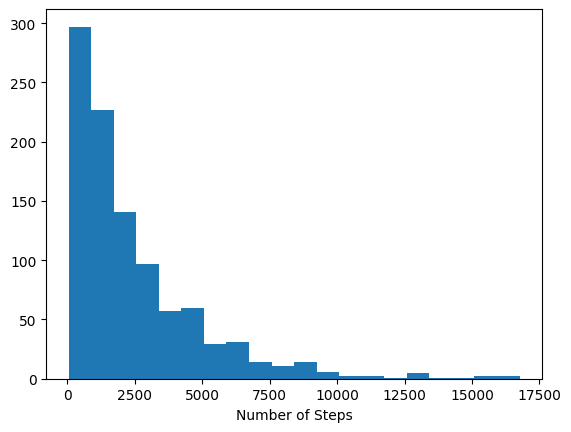

In [7]:
plt.hist(step_list,bins=20);
plt.xlabel("Number of Steps");

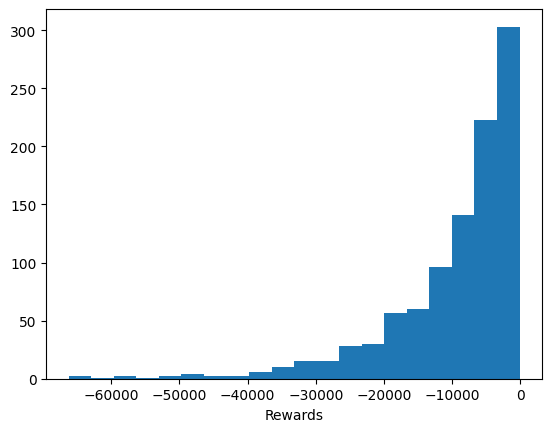

In [8]:
plt.hist(reward_list,bins = 20);
plt.xlabel("Rewards");

# Q learning

In [9]:
def change_rewards(reward):
    if reward==20:
        return 50
    elif reward == -10:
        return -10
    else:
        return -1

In [10]:
def QLearningTaxi(epoch, epsilon, gamma, lr, change_weight = False):
    n_states = env.observation_space.n
    n_actions = env.action_space.n
    Q_table = [[0 for i in range(n_actions)] for i in range(n_states)]
    reward_list = []
    step_list = []


    for j in range(epoch):
        env.reset()  # each episode
        state = env.observation_space.sample()
        done = False
        reward_sum = 0
        step = 0
        while not done:  # each state
            random = env.np_random.random()
            if random < epsilon:
                action = env.action_space.sample()
            else:
                action = np.argmax(Q_table[state])

            new_state, reward, done, _, info = env.step(action)
            if change_weight:
                reward = change_rewards(reward)
            Q_table[state][action] += lr * \
                (reward+gamma*max(Q_table[new_state])-Q_table[state][action])

            state = new_state
            reward_sum += reward
            step += 1
            if step>3000:
                break


        env.close()
        if j%100==0:
            lr = lr/2
            epsilon = epsilon/2
        reward_list.append(reward_sum)
        step_list.append(step)
    return Q_table, reward_list, step_list


In [11]:
Q_table, reward_list, step_list = QLearningTaxi(
    epoch=1000, epsilon=0.2, gamma=0.99, lr=1, change_weight = False)


In [12]:
print(f"Mean number of steps: {np.mean(step_list[-100:]):0.1f}")
print(f"Mean total reward: {np.mean(reward_list[-100:]):0.2f}")
print(f"Mean reward per step: {np.mean(reward_list[-100:])/np.mean(step_list[-100:]):0.3f}")

Mean number of steps: 21.1
Mean total reward: -0.45
Mean reward per step: -0.021


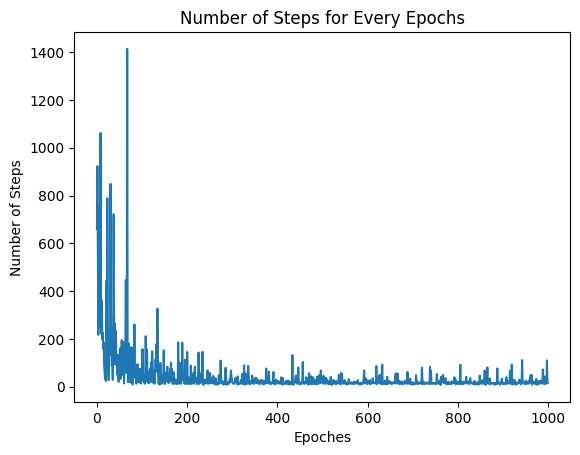

In [13]:
plt.plot(step_list)
plt.xlabel("Epoches")
plt.ylabel("Number of Steps")
plt.title("Number of Steps for Every Epochs");

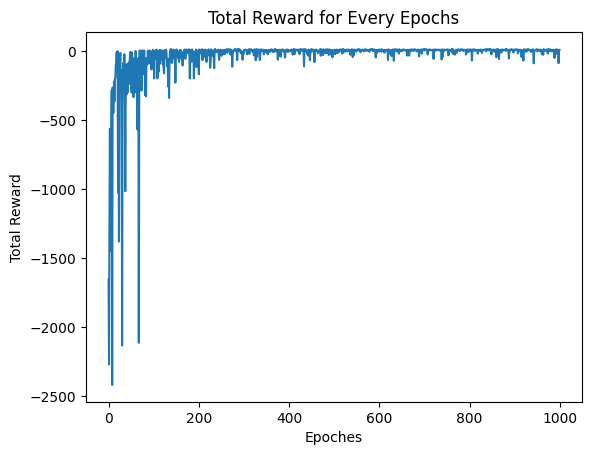

In [14]:
plt.plot(reward_list)
plt.xlabel("Epoches")
plt.ylabel("Total Reward")
plt.title("Total Reward for Every Epochs");

## changing weights

In [18]:
Q_table, reward_list, step_list = QLearningTaxi(
    epoch=200, epsilon=0.2, gamma=0.99, lr=1, change_weight = False)

Q_table, reward_list_changed, step_list_changed = QLearningTaxi(
    epoch=200, epsilon=0.2, gamma=0.99, lr=1, change_weight = True)

In [19]:
print(f"Mean number of steps without change: {np.mean(step_list[-50:]):0.1f}")

print(f"Mean number of steps with change: {np.mean(step_list_changed[-50:]):0.1f}")

Mean number of steps without change: 46.4
Mean number of steps with change: 36.6


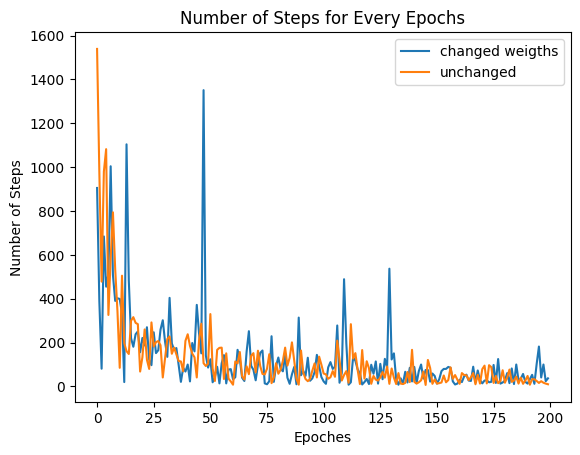

In [20]:
plt.plot(step_list)
plt.plot(step_list_changed)
plt.xlabel("Epoches")
plt.ylabel("Number of Steps")
plt.legend(["changed weigths","unchanged"])
plt.title("Number of Steps for Every Epochs");
